In [1]:
include("./../adversarial/dcgan.jl")
include("classifier.jl")

MLP

In [2]:
w = MLP.main("--hidden 256 128 64 32")
w2 = MLP.main("--hidden 128 64 32")

mlp.jl (c) Deniz Yuret, 2016. Multi-layer perceptron model on the MNIST handwritten digit recognition problem from http://yann.lecun.com/exdb/mnist.
opts=(:batchsize, 100)(:fast, false)(:atype, "Array{Float32}")(:epochs, 10)(:gcheck, 0)(:winit, 0.1)(:lr, 0.5)(:hidden, [256, 128, 64, 32])(:seed, -1)


INFO: Loading MNIST...


(60000,)
Array{UInt8,1}
(:epoch, 0, :trn, 0.10041666666666667, :tst, 0.0974)
(:epoch, 1, :trn, 0.9448333333333333, :tst, 0.9392)
(:epoch, 2, :trn, 0.9674333333333334, :tst, 0.9604)
(:epoch, 3, :trn, 0.9762, :tst, 0.964)
(:epoch, 4, :trn, 0.97945, :tst, 0.9665)
(:epoch, 5, :trn, 0.9877833333333333, :tst, 0.972)
(:epoch, 6, :trn, 0.98605, :tst, 0.9713)
(:epoch, 7, :trn, 0.9889666666666667, :tst, 0.9709)
(:epoch, 8, :trn, 0.9892333333333333, :tst, 0.9735)
(:epoch, 9, :trn, 0.99075, :tst, 0.9739)
(:epoch, 10, :trn, 0.98765, :tst, 0.9703)
 21.673086 seconds (9.61 M allocations: 19.111 GiB, 8.35% gc time)
mlp.jl (c) Deniz Yuret, 2016. Multi-layer perceptron model on the MNIST handwritten digit recognition problem from http://yann.lecun.com/exdb/mnist.
opts=(:batchsize, 100)(:fast, false)(:atype, "Array{Float32}")(:epochs, 10)(:gcheck, 0)(:winit, 0.1)(:lr, 0.5)(:hidden, [128, 64, 32])(:seed, -1)
(60000,)
Array{UInt8,1}
(:epoch, 0, :trn, 0.1041, :tst, 0.1081)
(:epoch, 1, :trn, 0.92638333333333

8-element Array{Any,1}:
 Float32[0.118755 -0.211762 … -0.0163261 0.0206702; -0.059665 -0.143577 … -0.102278 -0.0260817; … ; 0.0745909 -0.00738687 … 0.233697 -0.0691139; -0.028204 -0.22724 … 0.0917755 0.0237572]
 Float32[-0.224752; -0.0129229; … ; 0.200157; -0.138553]                                                                                                                                  
 Float32[-0.0278996 0.150484 … -0.199833 0.0113826; -0.225202 -0.277862 … 0.0191612 0.117627; … ; 0.40766 0.154982 … -0.339512 -0.0504742; 0.00138963 -0.0431729 … -0.137369 0.0547977]   
 Float32[0.382446; 0.142229; … ; 0.476624; 0.111373]                                                                                                                                      
 Float32[0.340454 0.160612 … -0.043889 -0.0629421; -0.139293 -0.0423721 … 0.0261355 0.449342; … ; 0.350034 -0.19638 … -0.500578 -0.466004; 0.229022 -0.0171794 … -0.44902 -0.105917]      
 Float32[0.857539; 0.178802; … ; -0.08936

In [7]:
wd, wg, md, mg = DCGAN.main("--epochs 0 --seed 1 --loadfile /Users/rishi/Project/GAN/MNIST/models/0020.jld2");

trying to load
Weights initialized
Array{UInt8,4}
(28, 28, 1, 10000)
Array{UInt8,1}
(10000,)
Array{UInt8,4}
(28, 28, 1, 1000)
Array{UInt8,1}
(1000,)
training started...
trained


In [ ]:
DCGAN.main("--epochs 20 --seed 1 --outdir /Users/rishi/Project/GAN/MNIST --data MNIST");

In [4]:
using Interact, Plots

file = ["","","","","","","","","",""]
file[1] = "/Users/rishi/Project/GAN/ReverseGan/one.txt"
file[2] = "/Users/rishi/Project/GAN/ReverseGan/two.txt"
file[3] = "/Users/rishi/Project/GAN/ReverseGan/three.txt"
file[4] = "/Users/rishi/Project/GAN/ReverseGan/four.txt"
file[5] = "/Users/rishi/Project/GAN/ReverseGan/five.txt"
file[6] = "/Users/rishi/Project/GAN/ReverseGan/six.txt"
file[7] = "/Users/rishi/Project/GAN/ReverseGan/seven.txt"
file[8] = "/Users/rishi/Project/GAN/ReverseGan/eight.txt"
file[9] = "/Users/rishi/Project/GAN/ReverseGan/nine.txt"
file[10] = "/Users/rishi/Project/Gan/ReverseGan/zero.txt"

"/Users/rishi/Project/Gan/ReverseGan/zero.txt"

In [8]:
f = open.(file, "w")

z = DCGAN.sample_noise(Array{Float64},100,5000)
println(size(z))
x = DCGAN.gnet(wg,z,mg; training = false)
y = reshape(x,784,:)
label1 = mapslices(indmax,MLP.predict(w,y),1)
label2 = mapslices(indmax,MLP.predict(w2,y),1)
#println(label)

for i=1:10
    idx = Array{Int64,1}()
    for j = 1:5000
        if label1[j] == i 
            push!(idx,j)
        end
    end
    #println(idx)
    println(size(z[:,idx]))
    writedlm(f[i], z[:,idx]', "\t")
end

for i=1:10
    close(f[i])
end

(100, 5000)
(100, 543)
(100, 210)
(100, 253)
(100, 426)
(100, 1327)
(100, 170)
(100, 1251)
(100, 11)
(100, 677)
(100, 132)


STDIN> 1


Interact.Options{:ToggleButtons,Any}(7: "input-3" = 1 Any , "digit", 1, "1", 0, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict{Any,Any}(Pair{Any,Any}(7, "7"),Pair{Any,Any}(4, "4"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(6, "6"),Pair{Any,Any}(1, "1")…)), Any[], Any[], true, "horizontal")

Interact.Textbox{Int64}(9: "input-4" = 1 Int64 , "n", nothing, 1)

size(z) = (100, 543)



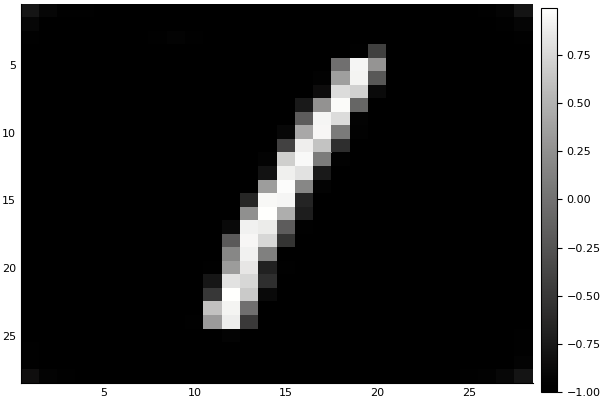

size(z) = (100, 210)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 11)


Failed to push!
    8
to node
    7: "input-3" = 8 Any (active)

error at node: 11: "map(input-3, input-4)" = Plot{Plots.PyPlotBackend() n=1} Any (active)
BoundsError: attempt to access 100×11 Array{Float64,2} at index [Base.Slice(Base.OneTo(100)), [20]]
throw_boundserror(::Array{Float64,2}, ::Tuple{Base.Slice{Base.OneTo{Int64}},Array{Int64,1}}) at ./abstractarray.jl:434
checkbounds at ./abstractarray.jl:362 [inlined]
macro expansion at ./multidimensional.jl:494 [inlined]
_getindex at ./multidimensional.jl:491 [inlined]
getindex(::Array{Float64,2}, ::Colon, ::Array{Int64,1}) at ./abstractarray.jl:883
(::##24#25)(::Int64, ::Int64) at ./In[9]:12
(::Reactive.##33#34{##24#25,Reactive.Signal{Any},Tuple{Reactive.Signal{Any},Reactive.Signal{Int64}}})() at /Users/rishi/.julia/v0.6/Reactive/src/operators.jl:39
foreach(::Reactive.#runaction, ::Array{Function,1}) at ./abstractarray.jl:1733
run_node(::Reactive.Signal{Any}) at /Users/rishi/.julia/v0.6/Reactive/src/core.jl:312
run_push(::Reactive.Si

size(z) = (100, 11)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 1251)


size(z) = (100, 210)


size(z) = (100, 253)


size(z) = (100, 426)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)
size(z) = (100, 1327)
size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


size(z) = (100, 1327)


In [9]:
using Colors

function input(prompt::String="")::String
    print(prompt)
    return chomp(readline())
end

@manipulate for digit = [1,2,3,4,5,6,7,8,9,10], n = parse(Int,input())
    z = readdlm(file[digit],'\t')'
    @show size(z)
    
    x = DCGAN.gnet(wg,z[:,[n]],mg; training = false)
    heatmap(x[:,:,1,1]',yflip=true, color=:gray)
end

(100, 1)



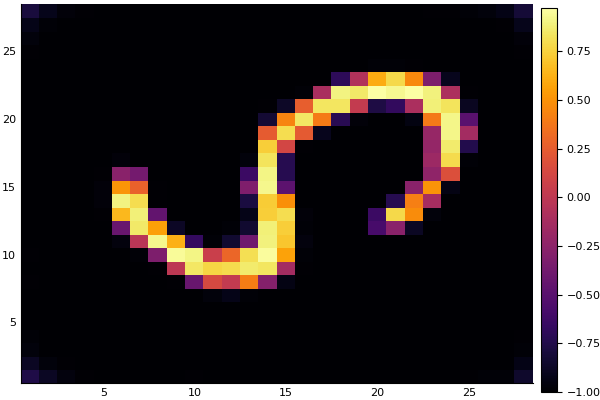

In [16]:
z = DCGAN.sample_noise(Array{Float64},100,1)
println(size(z))
x = DCGAN.gnet(wg,z,mg; training = false)
heatmap(x[:,:,1,1])

In [17]:
z

100×1 Array{Float64,2}:
  0.955472
 -0.140648
  0.54544 
  0.52151 
 -2.20006 
  0.213184
 -0.732745
 -0.167629
 -1.55561 
 -2.51481 
 -1.34561 
  1.39167 
 -2.82186 
  ⋮       
 -3.01892 
  1.42471 
 -1.23974 
 -2.67818 
 -1.32129 
 -1.80191 
 -2.37284 
  0.462698
  2.59481 
 -1.95591 
 -0.236751
  0.745629